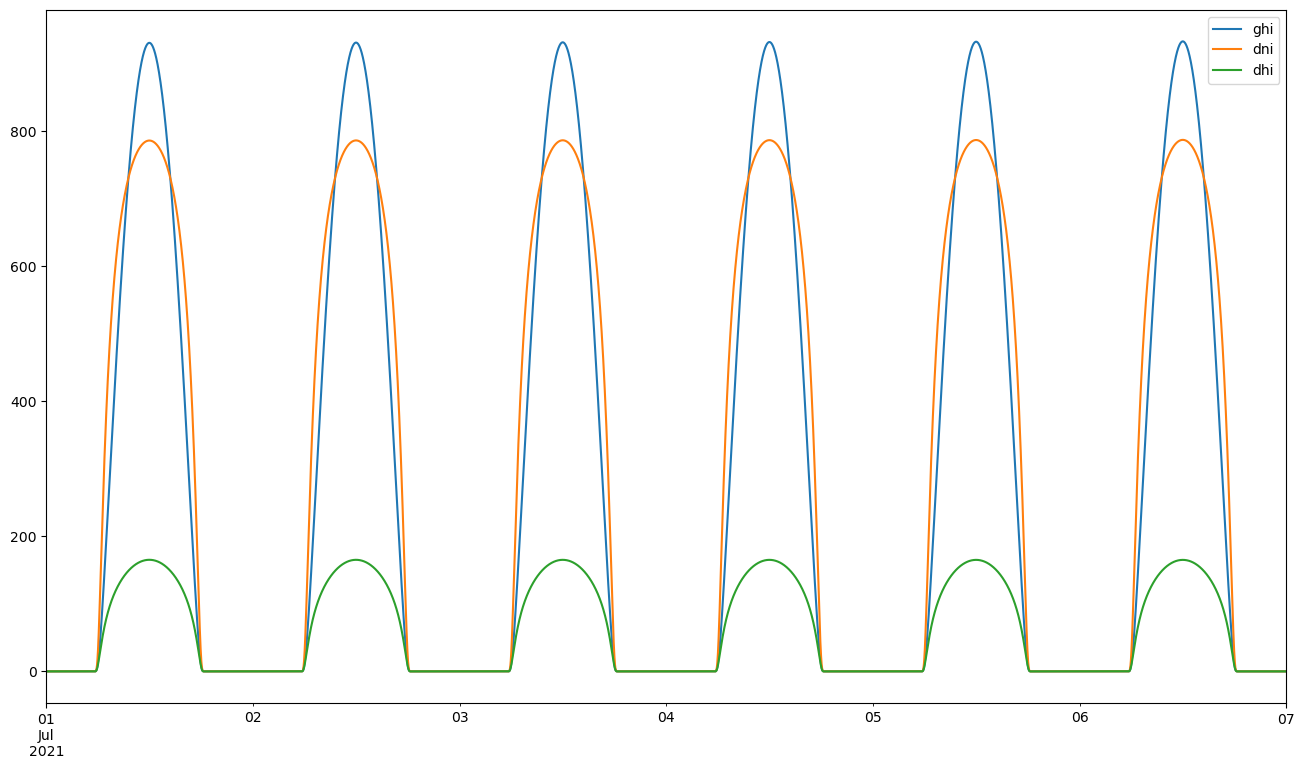

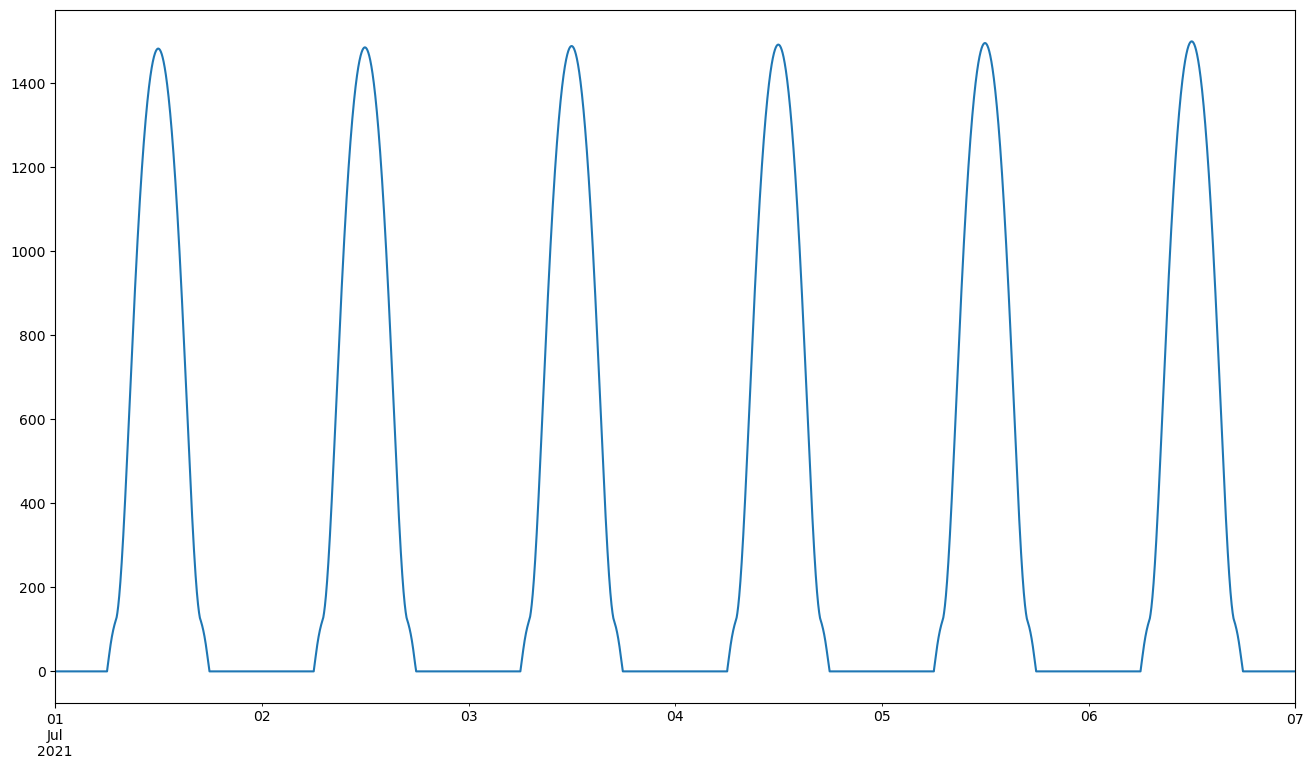

In [ ]:
import pvlib
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

import matplotlib.pyplot as plt

import pandas as pd

location = Location(latitude = 9.948427642217785, longitude = 76.56928756213607, tz = 'Indian/Maldives', altitude = 30, name = 'Home')

sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['ABB__PVI_3_0_OUTD_S_US__208V_']
# print(module)
# print(module.Impo * module.Vmpo)
# print(inverter)
temperature_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

system = PVSystem(surface_tilt=45, surface_azimuth=180,
                  module_parameters=module, inverter_parameters=inverter,
                  temperature_model_parameters=temperature_parameters,
                  modules_per_string=7, strings_per_inverter=2) 
modelChain = ModelChain(system,location)

times = pd.date_range(start = '2021-07-01', end='2021-07-07',
                      freq = '1min', tz = location.tz)

clear_sky = location.get_clearsky(times)
clear_sky.plot(figsize=(16,9))
plt.show()

modelChain.run_model(clear_sky)
modelChain.results.ac.plot(figsize=(16,9))
plt.show()

                     temp_air     ghi     dni     dhi  wind_speed
2021-01-01 00:00:00     23.92    0.00   -0.00    0.00        1.07
2021-01-01 01:00:00     24.37    0.00   -0.00    0.00        1.02
2021-01-01 02:00:00     24.83   76.45    0.00   76.45        0.97
2021-01-01 03:00:00     25.29  425.50  760.58  124.65        0.91
2021-01-01 04:00:00     25.74  604.45  827.77  123.10        0.86
...                       ...     ...     ...     ...         ...
2021-12-31 19:00:00     21.64    0.00   -0.00    0.00        1.34
2021-12-31 20:00:00     22.09    0.00   -0.00    0.00        1.29
2021-12-31 21:00:00     22.55    0.00   -0.00    0.00        1.23
2021-12-31 22:00:00     23.00    0.00   -0.00    0.00        1.18
2021-12-31 23:00:00     23.46    0.00   -0.00    0.00        1.13

[8760 rows x 5 columns]


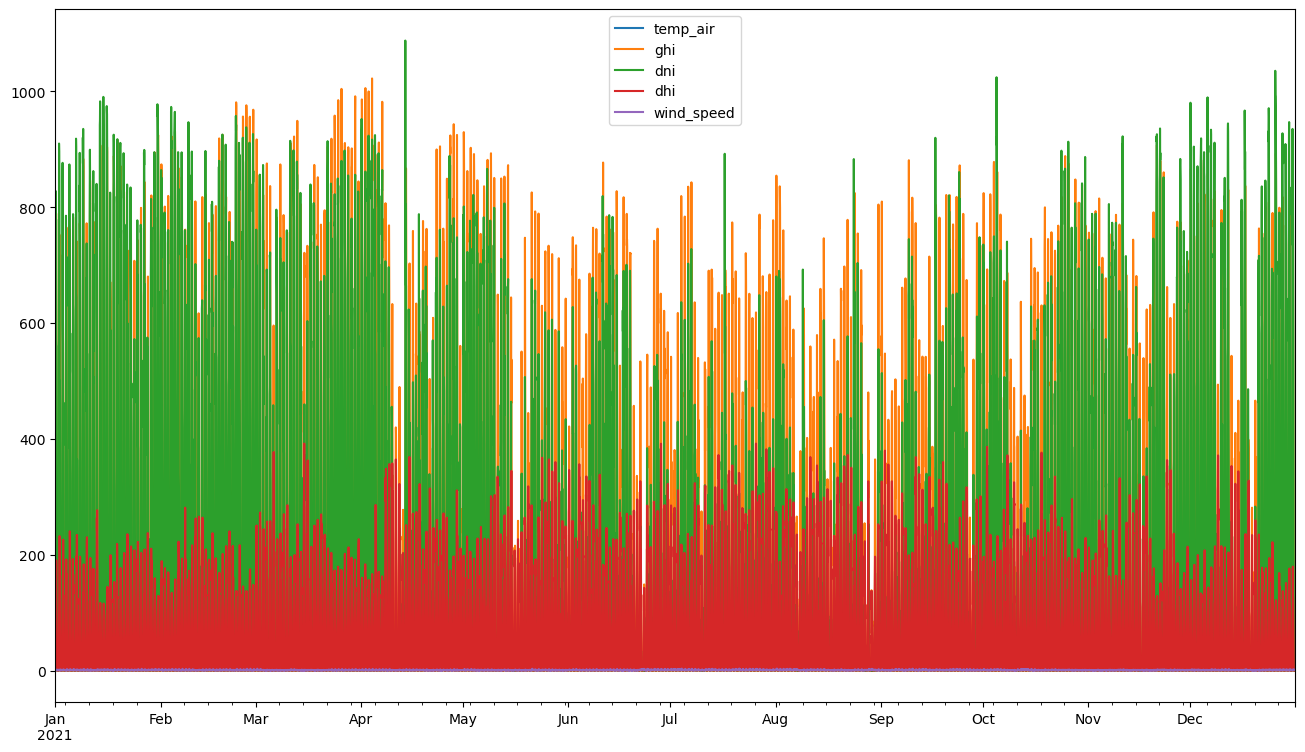

In [32]:
tmy = pd.read_csv('./pvg_east_marady.csv',skiprows=17, nrows=8760,
                  usecols=['time(UTC)','T2m','G(h)','Gb(n)','Gd(h)','WS10m'],
                  index_col=0)

#tmy.index = pd.to_datetime(tmy.index, format="%Y%m%d:%H%M")
tmy.index = pd.date_range(start='2021-01-01 00:00', end='2021-12-31 23:00', freq='h' )

tmy.columns=['temp_air','ghi','dni','dhi','wind_speed']

print(tmy)
tmy.plot(figsize=(16,9))

tmy.to_csv('pvlib_eastMarady.csv')

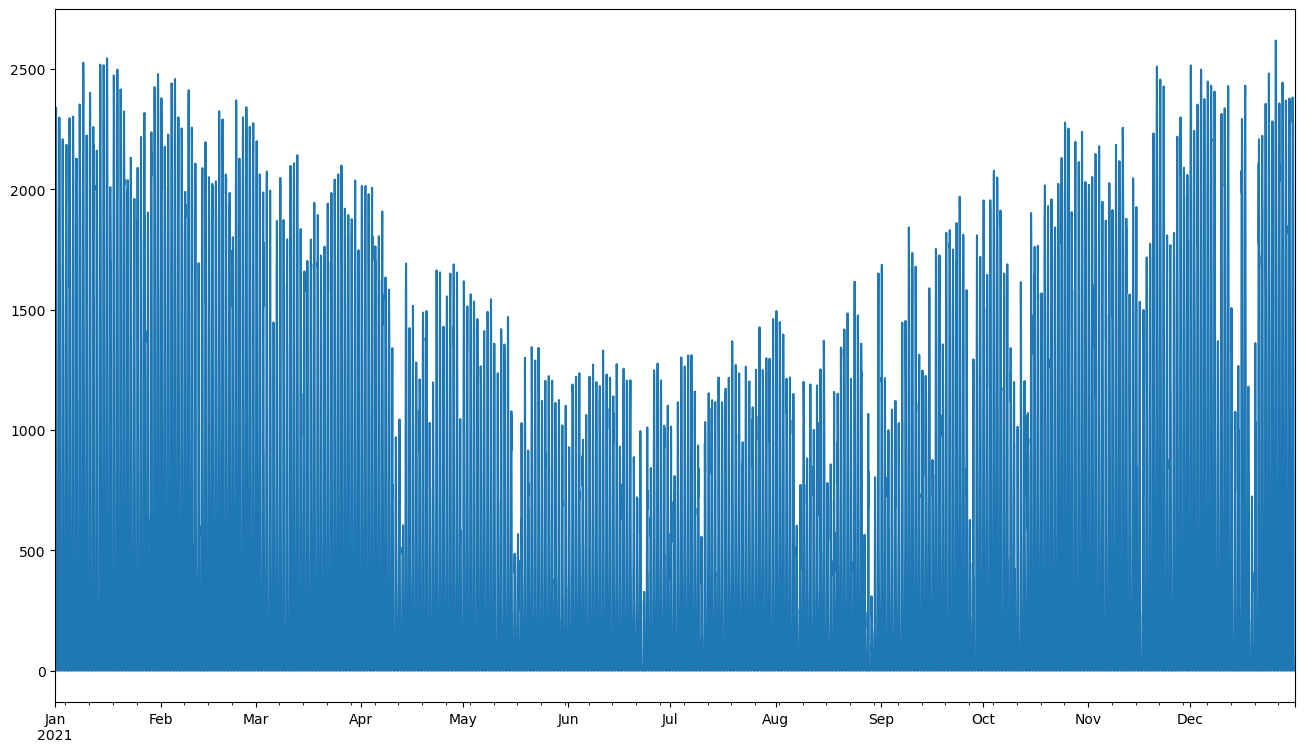

In [34]:
modelChain.run_model(tmy)
modelChain.results.ac.plot(figsize=(16,9))
plt.show()

C:\Users\Paul\AppData\Local\Temp\ipykernel_20296\2060745537.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  modelChain.results.ac.resample("M").sum().plot(figsize=(16,9))


<Axes: >

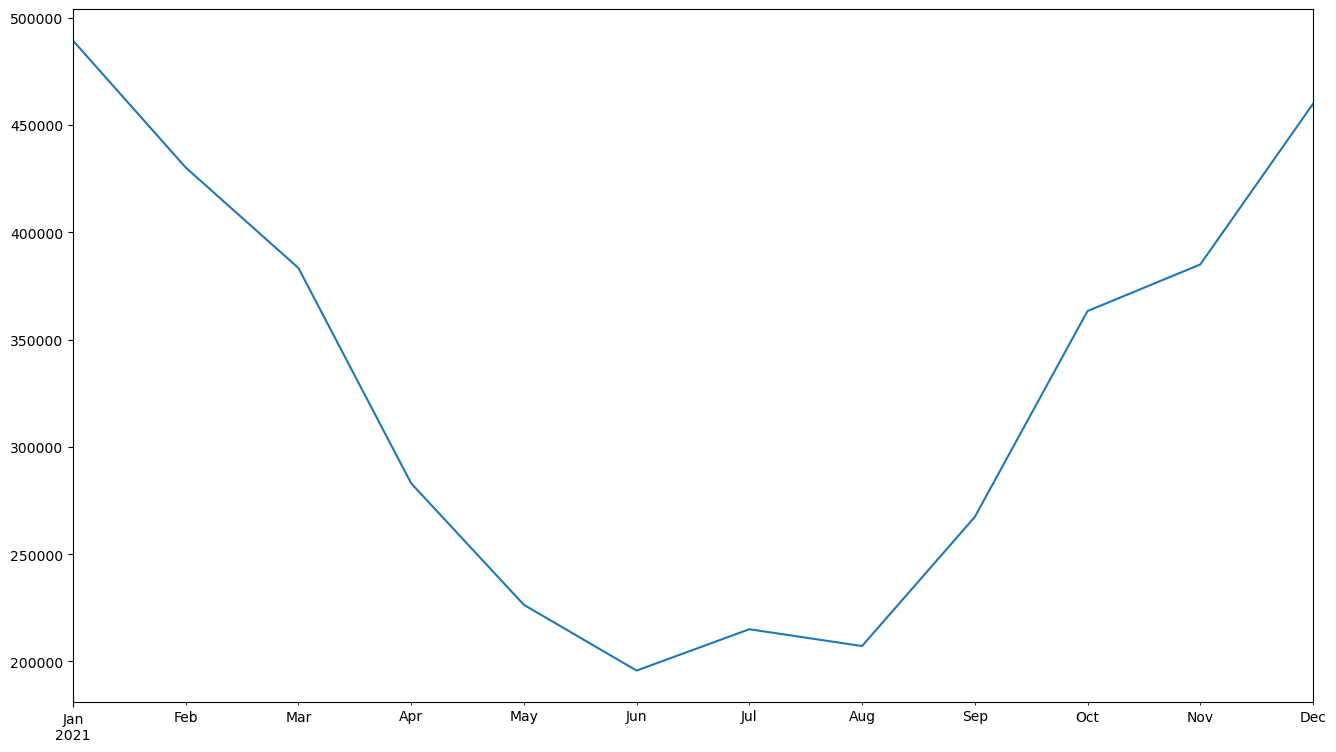

In [35]:
modelChain.results.ac.resample("M").sum().plot(figsize=(16,9))